In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
results_folder = 'v3_output/'

In [3]:
im_path_to_annotations = {}

In [4]:
ann_file = '../openrooms/annotation_files/train_main_xml_v3.json'
with open(ann_file,'r') as F:
    ann = json.load(F)

In [5]:
for annot in tqdm(ann['annotations']):
    image_path = ann['images'][annot['image_id']]['file_name']
    new_image_path = image_path
    if new_image_path not in im_path_to_annotations.keys():
        im_path_to_annotations[new_image_path] = [annot]
    else:
        im_path_to_annotations[new_image_path].append(annot)

 78%|███████▊  | 54940/70773 [00:00<00:00, 970931.52it/s]


KeyboardInterrupt: 

In [6]:
ann_file = '../openrooms/annotation_files/train_main_xml1_v3.json'
with open(ann_file,'r') as F:
    ann = json.load(F)

In [7]:
for annot in tqdm(ann['annotations']):
    image_path = ann['images'][annot['image_id']]['file_name']
    new_image_path = image_path
    if new_image_path not in im_path_to_annotations.keys():
        im_path_to_annotations[new_image_path] = [annot]
    else:
        im_path_to_annotations[new_image_path].append(annot)

100%|██████████| 70132/70132 [00:00<00:00, 902969.41it/s]


In [8]:
# len(im_path_to_annotations.keys())

In [9]:
ann_file = '../openrooms/annotation_files/train_main_xml_50_v3.json'
with open(ann_file,'r') as F:
    ann = json.load(F)

In [10]:
possible_mats = ['main_xml_50', 'main_xml_50_2', 'main_xml_50_3', 'main_xml_50_4','main_xml_50_5', 
                 'main_xml_50_lights_1', 'main_xml_50_lights_2', 'main_xml_50_lights_3']

In [11]:
for poss_mat in possible_mats:
    for annot in tqdm(ann['annotations']):
        image_path = ann['images'][annot['image_id']]['file_name']
        if poss_mat == 'main_xml_50':
            new_image_path = image_path
        else:
            new_image_path = image_path.replace('all_openrooms','stylized_all_openrooms').replace('main_xml_50',poss_mat)
        if new_image_path not in im_path_to_annotations.keys():
            im_path_to_annotations[new_image_path] = [annot]
        else:
            im_path_to_annotations[new_image_path].append(annot)

100%|██████████| 69874/69874 [00:00<00:00, 557476.79it/s]


In [12]:
len(im_path_to_annotations.keys())

148153

In [13]:
new_image_path

'openrooms/stylized_all_openrooms/main_xml_50_lights_3//scene0469_02/im_6.png'

In [14]:
import pickle
with open('core/image_paths_to_annots.p','wb') as F:
    pickle.dump(im_path_to_annotations, F)

In [15]:
ann['images'][0]

{'file_name': 'openrooms/all_openrooms/main_xml_50//scene0251_00/im_1.png',
 'id': 0,
 'height': 480,
 'width': 640}

# Material Change Results

In [6]:
crt_net_folders = ['lower_bound_material_50',
                  '1_style_hotswapped_material_50',
                  '2_style_hotswapped_material_50',
                  '3_style_hotswapped_material_50',
                   '4_style_hotswapped_material_50',
                   '5_style_hotswapped_material_50',
                  ]

In [7]:
def get_accuracy_from_folder(fol,stub):
    fol_path = os.path.join(results_folder, fol)
    ood_file = os.path.join(fol_path, '%s_accuracies.json'%stub)
    with open(ood_file,'r') as F:
        results = json.load(F)
    acc = results['total_accuracy']
    return acc

In [8]:
crt_net_ood_materials_results = {}

styles_count = 50
for fol in crt_net_folders:
    acc = get_accuracy_from_folder(fol, 'unseen_materials')
    crt_net_ood_materials_results[styles_count] = acc
    styles_count += 50

In [9]:
crt_net_ood_materials_results_no_context = {}

styles_count = 50
for fol in crt_net_folders:
    fol = '%s_no_context'%fol
    acc = get_accuracy_from_folder(fol, 'unseen_materials')
    crt_net_ood_materials_results_no_context[styles_count] = acc
    styles_count += 50

In [10]:
crt_net_ood_materials_results_lift_the_flap = {}

styles_count = 50
for fol in crt_net_folders:
    fol = '%s_lift_the_flap'%fol
    acc = get_accuracy_from_folder(fol, 'unseen_materials')
    crt_net_ood_materials_results_lift_the_flap[styles_count] = acc
    styles_count += 50

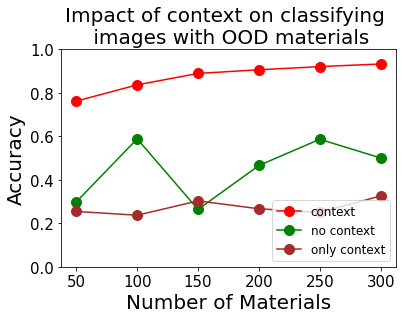

In [11]:
xs = crt_net_ood_materials_results.keys()
ys = crt_net_ood_materials_results.values()
plt.plot(xs,ys,marker='o',color='red', markersize=10, label='context')


xs_no_context = crt_net_ood_materials_results_no_context.keys()
ys_no_context = crt_net_ood_materials_results_no_context.values()
plt.plot(xs_no_context,ys_no_context,marker='o',color='green', markersize=10, label='no context')

xs_lift_the_flap = crt_net_ood_materials_results_lift_the_flap.keys()
ys_lift_the_flap = crt_net_ood_materials_results_lift_the_flap.values()
plt.plot(xs_lift_the_flap,ys_lift_the_flap,marker='o',color='brown', markersize=10, label='only context')


plt.ylim(0,1)
plt.title('Impact of context on classifying \n images with OOD materials',fontsize=20)
plt.xlabel('Number of Materials', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Material vs Style Transfer

In [12]:
crt_net_style_folders = ['lower_bound_material_50',
                  '1_transfer_style_hotswapped_material_50',
                  '2_transfer_style_hotswapped_material_50',
                  '3_transfer_style_hotswapped_material_50',
                   '4_transfer_style_hotswapped_material_50',
                   '5_transfer_style_hotswapped_material_50',
                  ]

In [13]:
crt_net_ood_materials_results_style_transfer = {}

styles_count = 50
for fol in crt_net_style_folders:
    acc = get_accuracy_from_folder(fol, 'unseen_materials')
    crt_net_ood_materials_results_style_transfer[styles_count] = acc
    styles_count += 50

In [14]:
plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')

NameError: name 'viewpoint_results' is not defined

In [15]:
xs

dict_keys([50, 100, 150, 200, 250, 300])

In [16]:
list(ys)

[0.7619353532791138,
 0.8367480635643005,
 0.8892835378646851,
 0.9061455130577087,
 0.9206923842430115,
 0.9327677488327026]

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

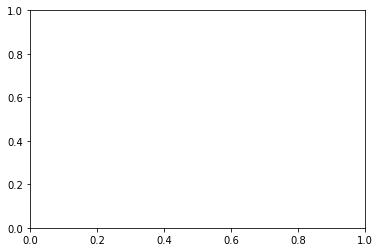

In [17]:
xs = crt_net_ood_materials_results.keys()
ys = crt_net_ood_materials_results.values()
plt.plot(range(5),list(ys)[:-3],marker='o',color='red', markersize=10, label='materials')

xs_style_transfer = crt_net_ood_materials_results_style_transfer.keys()
ys_style_transfer = crt_net_ood_materials_results_style_transfer.values()
plt.plot(range(5),ys_style_transfer[:-3],marker='o',color='green', markersize=10, label='style transfer')

plt.ylim(0.5,1)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=15)
plt.yticks(fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/mat_light_viewpoint.pdf', bbox_inches='tight')
plt.show()

In [18]:
# xs = crt_net_ood_materials_results.keys()
# ys = crt_net_ood_materials_results.values()
# plt.plot(xs,ys,marker='o',color='red', markersize=10, label='materials')

# xs_style_transfer = crt_net_ood_materials_results_style_transfer.keys()
# ys_style_transfer = crt_net_ood_materials_results_style_transfer.values()
# plt.plot(xs_style_transfer,ys_style_transfer,marker='o',color='green', markersize=10, label='style transfer')



# # xs = crt_net_ood_materials_results_no_context.keys()
# # ys_no_context = crt_net_ood_materials_results_no_context.values()
# # plt.plot(xs_no_context,ys_no_context,marker='o',color='green', markersize=10, label='no context')

# plt.ylim(0.5,1)
# plt.title('Material Diversity v/s Style Transfer',fontsize=20)
# plt.xlabel('Number of Materials/Styles', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
# plt.legend(loc="lower right", fontsize=12)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()

# Material vs Light vs Viewpoint

In [19]:
material_folders = ['lower_bound_material_50',
                  '1_style_hotswapped_material_50',
                  '2_style_hotswapped_material_50',
                  '3_style_hotswapped_material_50',
#                    '4_style_hotswapped_material_50',
                  ]

lighting_folders = ['lower_bound_lights_50',
                   'one_hotswapped_light_50',
                   'two_hotswapped_light_50',
                   'three_hotswapped_light_50',
#                    'four_hotswapped_light_50'
                   ]

viewpoint_folders = ['lower_bound_viewpoints_0_1',
                    'viewpoint_hotswapped_1',
                    'viewpoint_hotswapped_2',
                    'viewpoint_hotswapped_3']
# viewpoint_folders = ['lower_bound_viewpoints_0_1',
#                     'lower_bound_viewpoints_0_2',
#                     'lower_bound_viewpoints_0_3',
#                     'lower_bound_viewpoints_0_4',
# #                     'lower_bound_viewpoints_0_4'
#                     ]

material_results = [get_accuracy_from_folder(i, 'unseen_materials') for i in material_folders]
light_results = [get_accuracy_from_folder(i, 'unseen_lights') for i in lighting_folders]
viewpoint_results = [get_accuracy_from_folder(i, 'unseen_viewpoints') for i in viewpoint_folders]

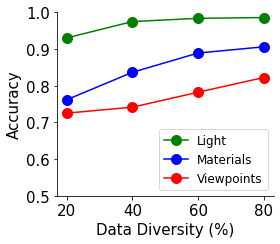

In [20]:
plt.figure(figsize=(4,3.5))
plt.plot(range(0,4), light_results, marker='o',color='green', markersize=10, label='Light')
plt.plot(range(0,4), material_results, marker='o',color='blue', markersize=10, label='Materials')
plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')
plt.ylim(0.5,1)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=15)
plt.yticks(fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/mat_light_viewpoint.pdf', bbox_inches='tight')
plt.show()

In [21]:
light_results

[0.9305368661880493,
 0.9750208258628845,
 0.9838259220123291,
 0.9860092997550964]

In [22]:
material_results

[0.7619353532791138,
 0.8367480635643005,
 0.8892835378646851,
 0.9061455130577087]

In [23]:
viewpoint_results

[0.7253805994987488,
 0.7416310906410217,
 0.7823638319969177,
 0.8224554061889648]

# ScanNet results

In [27]:
material_folders = ['lower_bound_material_50',
                  '1_style_hotswapped_material_50',
                  '2_style_hotswapped_material_50',
                  '3_style_hotswapped_material_50',
#                    '4_style_hotswapped_material_50',
                  ]

lighting_folders = ['lower_bound_lights_50',
                   'one_hotswapped_light_50',
                   'two_hotswapped_light_50',
                   'three_hotswapped_light_50',
#                    'three_hotswapped_light_50'
                   ]

viewpoint_folders = ['lower_bound_viewpoints_0_1',
                    'viewpoint_hotswapped_1',
                    'viewpoint_hotswapped_2',
                    'viewpoint_hotswapped_3']
# viewpoint_folders = ['lower_bound_viewpoints_0_1',
#                     'lower_bound_viewpoints_0_2',
#                     'lower_bound_viewpoints_0_3',
#                     'lower_bound_viewpoints_0_4',
# #                     'lower_bound_viewpoints_0_4'
#                     ]

material_results = [get_accuracy_from_folder(i, 'scannet') for i in material_folders]
light_results = [get_accuracy_from_folder(i, 'scannet') for i in lighting_folders]
viewpoint_results = [get_accuracy_from_folder(i, 'scannet') for i in viewpoint_folders]

In [28]:
material_results[-1]

0.4654982388019562

In [29]:
light_results[-1]

0.46590569615364075

In [30]:
viewpoint_results[-1]

0.4851631820201874

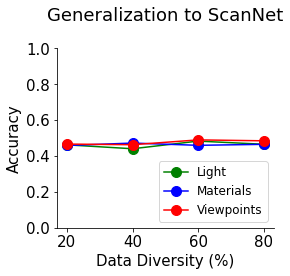

In [31]:
plt.figure(figsize=(4,4))
plt.plot(range(0,4), light_results, marker='o',color='green', markersize=10, label='Light')
plt.plot(range(0,4), material_results, marker='o',color='blue', markersize=10, label='Materials')
plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')
plt.ylim(0,1)
plt.title('Generalization to ScanNet',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=15)
plt.yticks(fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/scannet_results.pdf', bbox_inches='tight')

plt.show()

# Geometry Deformation

In [32]:
material_folders = ['lower_bound_material_50',
                  '1_style_hotswapped_material_50',
                  '2_style_hotswapped_material_50',
                  '3_style_hotswapped_material_50',
#                    '4_style_hotswapped_material_50',
                  ]

lighting_folders = ['lower_bound_lights_50',
                   'one_hotswapped_light_50',
                   'two_hotswapped_light_50',
                   'three_hotswapped_light_50',
#                    'three_hotswapped_light_50'
                   ]

viewpoint_folders = ['lower_bound_viewpoints_0_1',
                    'viewpoint_hotswapped_1',
                    'viewpoint_hotswapped_2',
                    'viewpoint_hotswapped_3']
# viewpoint_folders = ['lower_bound_viewpoints_0_1',
#                     'lower_bound_viewpoints_0_2',
#                     'lower_bound_viewpoints_0_3',
#                     'lower_bound_viewpoints_0_4',
# #                     'lower_bound_viewpoints_0_4'
#                     ]

material_results = [get_accuracy_from_folder(i, 'deformed_geometry') for i in material_folders]
light_results = [get_accuracy_from_folder(i, 'deformed_geometry') for i in lighting_folders]
viewpoint_results = [get_accuracy_from_folder(i, 'deformed_geometry') for i in viewpoint_folders]

In [33]:
material_results

[0.5961586236953735,
 0.6114398241043091,
 0.5920539498329163,
 0.6191846132278442]

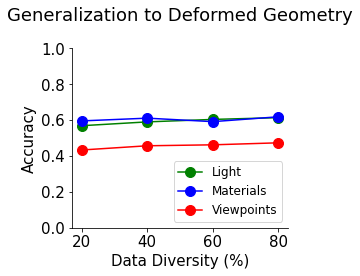

In [34]:
plt.figure(figsize=(4,4))
plt.plot(range(0,4), light_results, marker='o',color='green', markersize=10, label='Light')
plt.plot(range(0,4), material_results, marker='o',color='blue', markersize=10, label='Materials')
plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')
plt.ylim(0,1)
plt.title('Generalization to Deformed Geometry',fontsize=18, y=1.12);
plt.xlabel('Data Diversity (%)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(4), labels = [20,40,60,80], fontsize=15)
plt.yticks(fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('paper_figures/deformed_geometry_results.pdf', bbox_inches='tight')

plt.show()

In [40]:
top_folders = ['four_hotswapped_light_50', '4_style_hotswapped_material_50', 'viewpoint_hotswapped_3']
ood_material_results = [get_accuracy_from_folder(i, 'ood_materials') for i in top_folders]

FileNotFoundError: [Errno 2] No such file or directory: 'v3_output/3_style_hotswapped_material_50/ood_materials_accuracies.json'

In [ ]:
ood_material_resul

In [36]:
viewpoint_results[-1]

0.47395262122154236

In [37]:
light_results[-1]

0.614291250705719

In [38]:
import json
import random

# Cross domain results

In [7]:
original_file = '../openrooms/annotation_files/train_main_viewpoints_5_v3.json'
faster_rcnn_annotation_file = '../openrooms/annotation_files/train_main_viewpoints_5_v3_fasterrcnn.json'

In [8]:
with open(original_file,'r') as F:
    train_annotations = json.load(F)

In [9]:
faster_rcnn_annotations = {}

train_annotations.keys()

faster_rcnn_annotations['categories'] = train_annotations['categories']
faster_rcnn_annotations['images'] = train_annotations['images']

all_faster_rcnn_annots = []
annot_id = 0
for annot in train_annotations['annotations']:
    new_annot_dict = {}
    new_annot_dict['area'] = annot['area']
    new_annot_dict['iscrowd'] = annot['iscrowd']
    new_annot_dict['image_id'] = annot['image_id']
    new_annot_dict['category_id'] = annot['category_id']
    new_annot_dict['bbox'] = annot['bbox']
    new_annot_dict['id'] = annot_id
    annot_id += 1
    all_faster_rcnn_annots.append(new_annot_dict)

faster_rcnn_annotations['annotations'] = all_faster_rcnn_annots

In [10]:
with open(faster_rcnn_annotation_file,'w') as F:
    json.dump(faster_rcnn_annotations, F)

# Make figure for multiple materials

In [54]:
import random
from PIL import Image

In [151]:
folder = '../openrooms/stylized_all_openrooms/main_xml_50_2/'
scene_fols = os.listdir(folder)
random.shuffle(scene_fols)
random_scene_fol = scene_fols[0]
scene_fol_path = os.path.join(folder, random_scene_fol)
images = [i for i in os.listdir(scene_fol_path) if i.endswith('png')]
random.shuffle(images)
random_image = images[0]

print(image_path.replacz)

image_path = os.path.join(scene_fol_path, random_image)
# image_path = "../openrooms/stylized_all_openrooms/main_xml_50_2/scene0574_02/im_14.png"
image_path_2 = image_path.replace('main_xml_50_2','main_xml_50_3')
image_path_3 = image_path.replace('main_xml_50_2','main_xml_50_4')
image_path_4 = image_path.replace('main_xml_50_2','main_xml_50_5')

../openrooms/stylized_all_openrooms/main_xml_50_2/scene0332_01/im_5.png


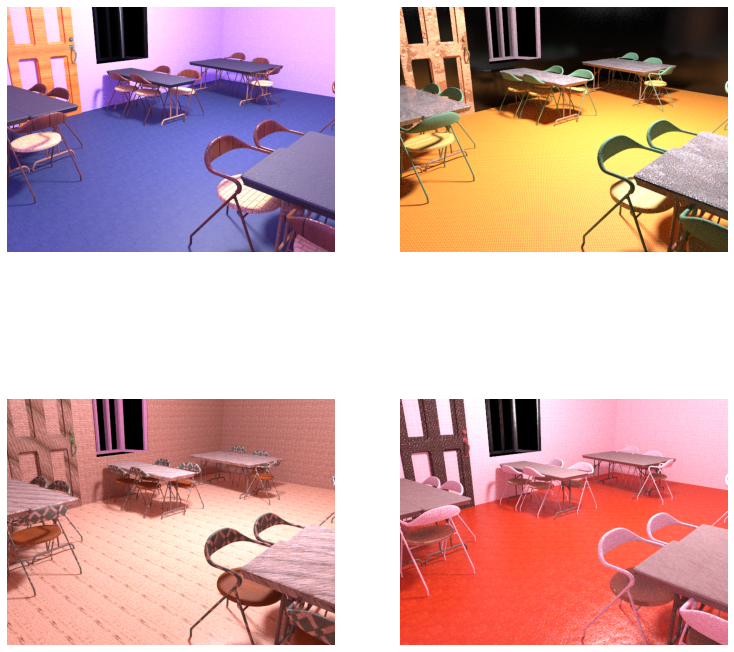

In [154]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(Image.open(image_path))
axs[0,0].axis('off')
axs[0, 1].imshow(Image.open(image_path_2))
axs[0,1].axis('off')
axs[1, 0].imshow(Image.open(image_path_3))
axs[1,0].axis('off')
axs[1, 1].imshow(Image.open(image_path_4))
axs[1,1].axis('off')
fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.show()

In [155]:
image_path

'../openrooms/stylized_all_openrooms/main_xml_50_2/scene0041_00/im_5.png'

In [54]:
from PIL import Image

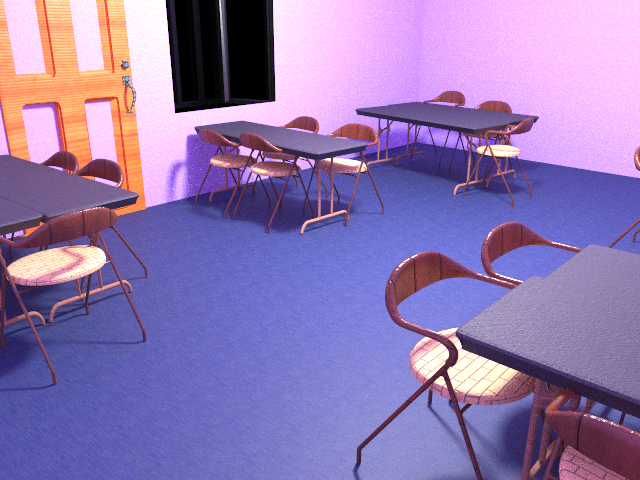

In [57]:
Image.open('../openrooms/stylized_all_openrooms/main_xml_50_2/scene0041_00/im_5.png')

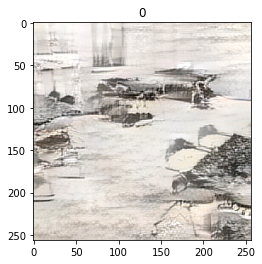

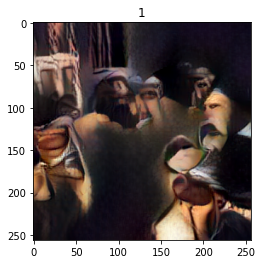

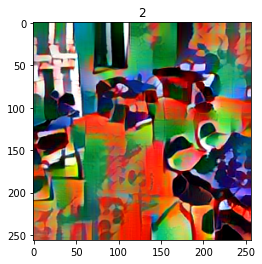

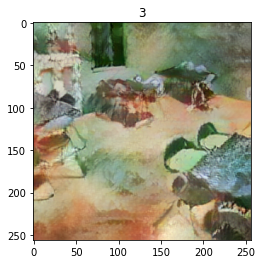

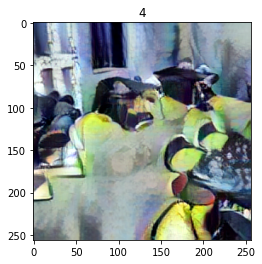

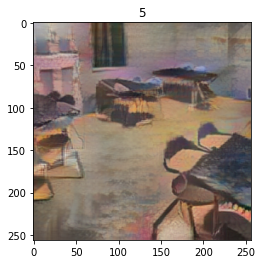

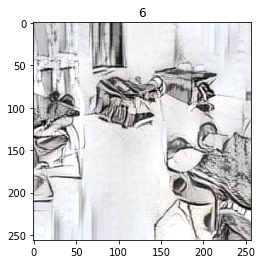

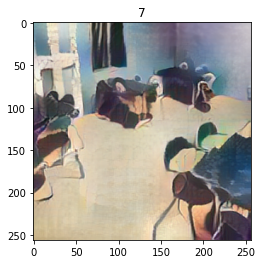

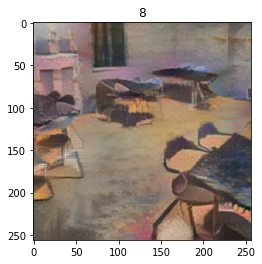

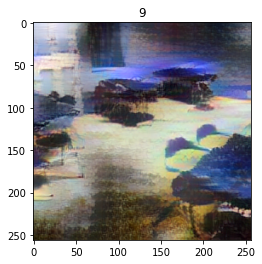

In [59]:
for i in range(10):
    path = '../openrooms/stylized_all_openrooms/main_xml_50_arbitrary_many_styles_repeat_%s/scene0041_00/im_5.png'%i
    plt.imshow(Image.open(path))
    plt.title(i)
    plt.show()

# iLab Results

In [3]:
import os
import json
import pandas

In [4]:
ilab_fol = 'ilab_v3_extreme/'

In [5]:
archs = []
for fol in os.listdir(ilab_fol):
    if 'light' in fol:
        print(fol)
        archs.append(fol.split('_')[0])

resnet_light
densenet_light
vit_light
mobilenet_light
squeezenet_light


In [6]:
archs

['resnet', 'densenet', 'vit', 'mobilenet', 'squeezenet']

In [7]:
def get_best_perf(fol):
    test_files = []
    for file in os.listdir(fol):
        if 'test' in file:
            test_files.append(file)
    
    last_test_file = sorted(test_files)[-1]
    last_file_path = os.path.join(fol, last_test_file)
    with open(last_file_path,'r') as F:
        contents = json.load(F)
    final_acc = contents['total_accuracy']
    return final_acc

In [8]:
# get_best_perf(viewpoint_fol)

In [9]:
arch_to_perf = {}
for arch in archs:
    arch_to_perf[arch] = {}
    viewpoint_fol = "%s/%s_viewpoints"%(ilab_fol, arch)
    light_fol = "%s/%s_light"%(ilab_fol, arch)
    style_fol = "%s/%s_style"%(ilab_fol, arch)
    
    arch_to_perf[arch]['viewpoint'] = get_best_perf(viewpoint_fol)
    arch_to_perf[arch]['style'] = get_best_perf(style_fol)
    arch_to_perf[arch]['light'] = get_best_perf(light_fol)

In [10]:
arch_to_perf

{'resnet': {'viewpoint': 0.4349184036254883,
  'style': 0.9399866461753845,
  'light': 0.9881402254104614},
 'densenet': {'viewpoint': 0.519980788230896,
  'style': 0.8815144300460815,
  'light': 0.9459779858589172},
 'vit': {'viewpoint': 0.5437504053115845,
  'style': 0.8891200423240662,
  'light': 0.8774347901344299},
 'mobilenet': {'viewpoint': 0.3132151961326599,
  'style': 0.7770703434944153,
  'light': 0.8247950077056885},
 'squeezenet': {'viewpoint': 0.34782442450523376,
  'style': 0.7766720056533813,
  'light': 0.7588678598403931}}

In [11]:
pandas.DataFrame.from_dict(arch_to_perf)

,resnet,densenet,vit,mobilenet,squeezenet
viewpoint,0.434918,0.519981,0.543750,0.313215,0.347824
style,0.939987,0.881514,0.889120,0.777070,0.776672
light,0.988140,0.945978,0.877435,0.824795,0.758868


# Blur results

In [12]:
blur_folder = 'ablation_experiments_blurred/'


In [13]:
blur_levels = []

for fol in os.listdir(blur_folder):
    if 'context_blur' in fol:
        print(fol)
        blur_levels.append(fol.split('_')[-1])

context_blur_0
context_blur_5
context_blur_10
context_blur_20


In [14]:
blur_to_perf = {}
for blur in blur_levels:
    blur_to_perf[blur] = {}
    context_fol = "%s/context_blur_%s"%(blur_folder, blur)
    target_fol = "%s/target_blur_%s"%(blur_folder, blur)
    
    try:
        
        blur_to_perf[blur]['target_blur'] = get_best_perf(target_fol)
    except: 
        blur_to_perf[blur]['target_blur'] = -1
    try:   
        blur_to_perf[blur]['context_blur'] = get_best_perf(context_fol)
    except:
        blur_to_perf[blur]['context_blur'] = -1

In [15]:
blur_to_perf

{'0': {'target_blur': 0.7467307448387146, 'context_blur': 0.7553935647010803},
 '5': {'target_blur': 0.7013896703720093, 'context_blur': 0.7542675733566284},
 '10': {'target_blur': 0.644189715385437, 'context_blur': 0.7508695125579834},
 '20': {'target_blur': 0.6220253705978394, 'context_blur': -1}}

In [16]:
target_fol

'ablation_experiments_blurred//target_blur_20'

In [17]:
get_best_perf(target_fol)

0.6220253705978394

In [19]:
pandas.DataFrame.from_dict(blur_to_perf)

,0,5,10,20
target_blur,0.746731,0.701390,0.64419,0.622025
context_blur,0.755394,0.754268,0.75087,-1.000000
